In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [2]:
data = pd.read_csv("Housing.csv")
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1.5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0


In [3]:

data.describe()
     

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.881651
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.646137
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.500000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.500000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              545 non-null    int64  
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    int64  
 6   guestroom         545 non-null    int64  
 7   basement          545 non-null    int64  
 8   hotwaterheating   545 non-null    int64  
 9   airconditioning   545 non-null    int64  
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    int64  
 12  furnishingstatus  545 non-null    float64
dtypes: float64(1), int64(12)
memory usage: 55.5 KB


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

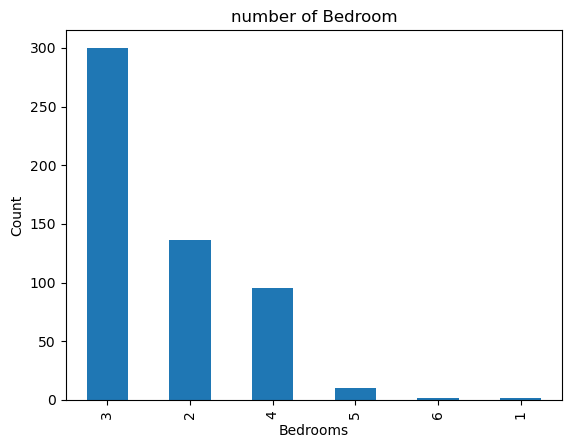

In [5]:
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

<Figure size 1000x1000 with 0 Axes>

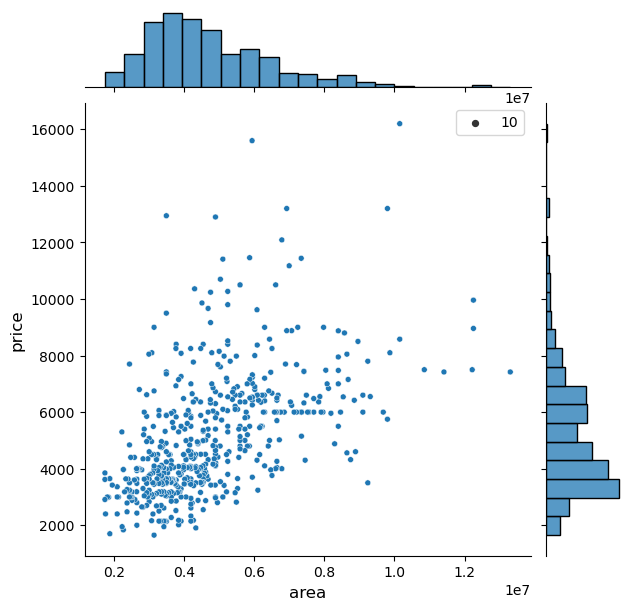

In [6]:
plt.figure(figsize=(10,10))
sns.jointplot(x=data.price.values, y=data.area.values, size=10)
plt.ylabel('price', fontsize=12)
plt.xlabel('area', fontsize=12)
plt.show()
     

Text(0.5, 1.0, 'Price vs area')

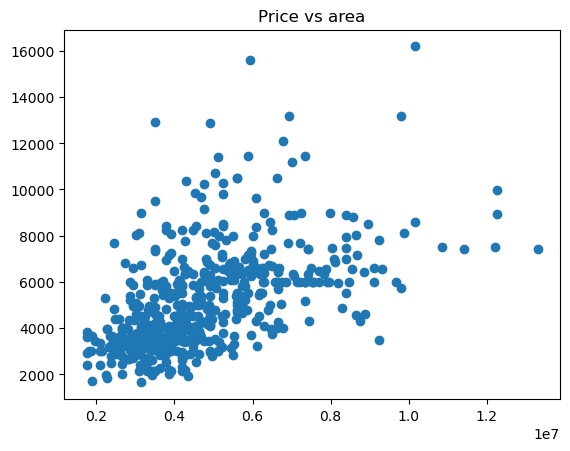

In [7]:
plt.scatter(data.price,data.area)
plt.title("Price vs area")

Text(0.5, 1.0, 'Price vs bedrooms')

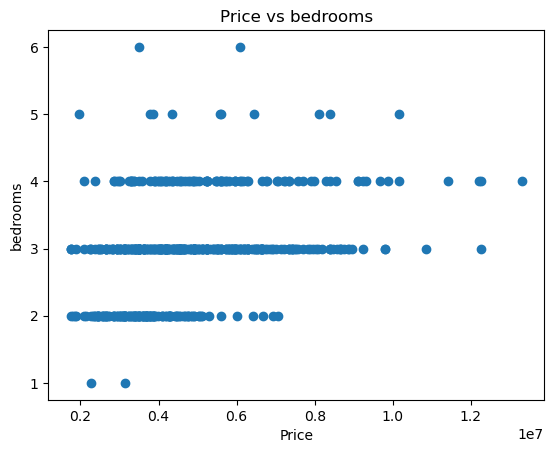

In [8]:
plt.scatter(data.price,data.bedrooms)
plt.xlabel("Price")
plt.ylabel('bedrooms')
plt.title("Price vs bedrooms")

Text(0.5, 1.0, 'Price vs bathrooms')

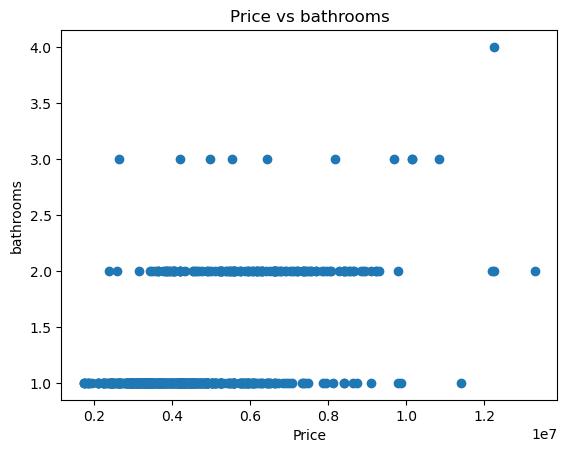

In [9]:
plt.scatter(data.price,data.bathrooms)
plt.xlabel("Price")
plt.ylabel('bathrooms')
plt.title("Price vs bathrooms")

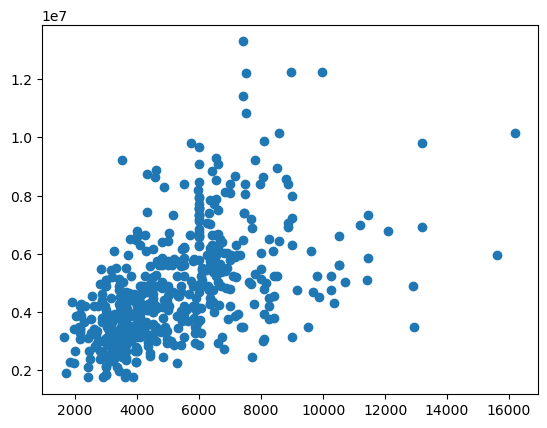

In [10]:
plt.scatter((data['area']+ data['basement']),data['price'])

Text(0.5, 1.0, 'hotwaterheating vs Price ( 0= no hotwaterheating)')

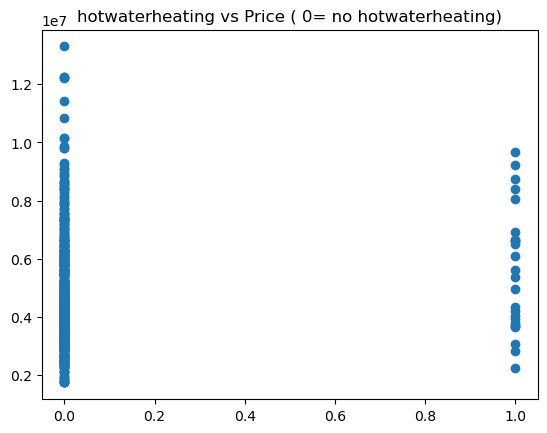

In [11]:
plt.scatter(data.hotwaterheating,data.price)
plt.title("hotwaterheating vs Price ( 0= no hotwaterheating)")

Text(0.5, 1.0, 'airconditioning vs Price ( 0= no airconditioning)')

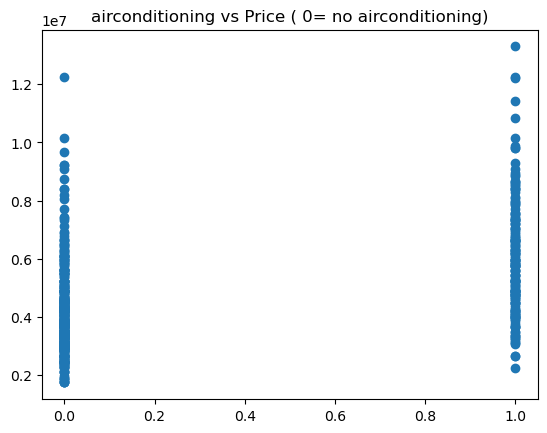

In [12]:
plt.scatter(data.airconditioning,data.price)
plt.title("airconditioning vs Price ( 0= no airconditioning)")

<Axes: >

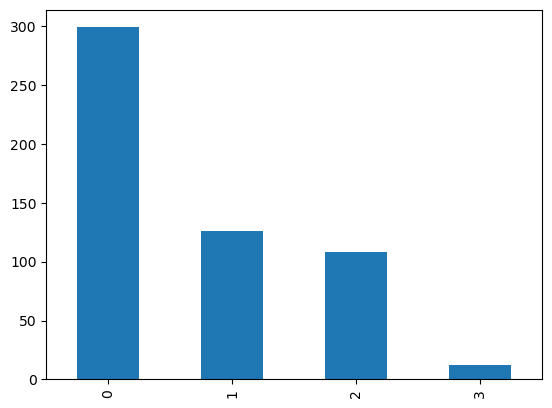

In [13]:
data.parking.value_counts().plot(kind='bar')

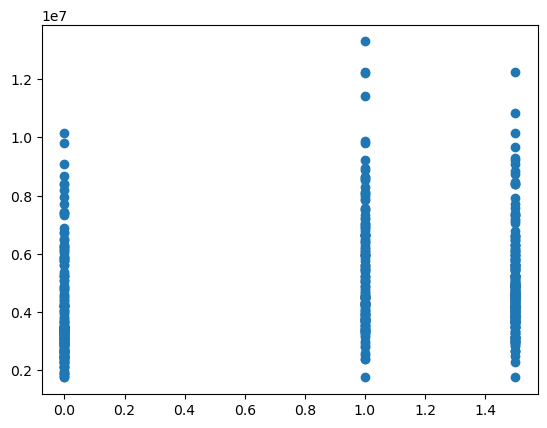

In [14]:
plt.scatter(data.furnishingstatus,data.price)
     

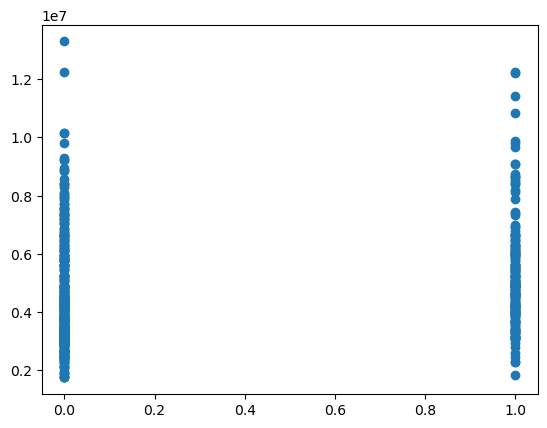

In [15]:
plt.scatter(data.basement,data.price)

In [16]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
labels = data['price']
conv_dates = [1 if values >=7000 else 0 for values in data.price ]
data['price'] = conv_dates
train1 = data.drop(['area', 'price'],axis=1)
     

In [17]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.10,random_state =2)

In [18]:

reg.fit(x_train,y_train)

LinearRegression()

In [19]:
reg.score(x_test,y_test)

0.613935861976211

In [20]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
X = data.drop(['price'],axis=1)
Y = data['area']
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [22]:
from sklearn.linear_model import LinearRegression
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)
print(mean_absolute_error(Y_valid, Y_pred))

9.428706541315678e-13


In [23]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error
model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)
print(mean_absolute_error(Y_valid, Y_pred))

1764.3110219556863


In [24]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [25]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [26]:
pca = PCA()

In [27]:
pca.fit_transform(scale(train1))

array([[ 3.00122615, -1.14596008, -1.05456289, ...,  0.16992754,
         0.49457756, -0.23735674],
       [ 4.92094722, -3.23885695,  0.24355477, ...,  2.4999183 ,
         0.78200169,  0.49010875],
       [ 1.79807705,  1.1452472 ,  0.41850764, ...,  0.84509616,
         0.2745238 ,  0.98746195],
       ...,
       [-2.25691719,  0.00977703, -0.7423579 , ...,  0.52249119,
        -0.0623584 , -0.25054039],
       [-1.9838276 , -0.70045978,  0.94172577, ..., -0.26237865,
         0.64048757, -0.4033479 ],
       [-1.22511394, -0.85359033, -0.61112851, ..., -0.37568159,
        -0.27954974, -0.0955206 ]])